# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### <mark>Data Problem:</mark>
- Explore features of the data that show a strong positive or negative correlation with the "price" feature to determine which factors result in an increase or decrease in price.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Exploration Steps
1) Visual inspection of the data entries.
2) List the data types and counts for each feature. Deal with any missing or erroneous data.
3) Encode any categorical data as numerical data.
4) Generate the correlation matrix.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

#### Step 1: Visual Inspection

In [2]:
data = pd.read_csv('data/vehicles.csv')
data

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Step 2: Dimensionality Reduction
Upon previous industry knowledge, the following features were selected in order to reduce dimensionality:

In [4]:
clean = data[['price', 'year', 'manufacturer', 'condition', 'odometer', 'title_status', 'size', 'type']].dropna()
clean

,price,year,manufacturer,condition,odometer,title_status,size,type
31,15000,2013.0,ford,excellent,128000.0,clean,full-size,truck
46,0,2011.0,jeep,excellent,99615.0,clean,full-size,SUV
55,19900,2004.0,ford,good,88000.0,clean,full-size,pickup
59,14000,2012.0,honda,excellent,95000.0,clean,full-size,mini-van
65,22500,2001.0,ford,good,144700.0,clean,full-size,truck
...,...,...,...,...,...,...,...,...
426808,18000,2005.0,chevrolet,excellent,130000.0,lien,full-size,truck
426809,18000,1990.0,jeep,good,114400.0,clean,full-size,SUV
426831,9800,1985.0,nissan,like new,115000.0,clean,sub-compact,hatchback
426833,6800,1997.0,jaguar,good,69550.0,clean,compact,convertible


In [5]:
# Prune year, price, and odometer for outlandish values
clean = clean[clean['year'] >= 1920]
clean = clean[clean['price'] <= 300000]
clean = clean[clean['odometer'] <= 2850000]

#### Step 3: Encoding Categorical Data as Numerical Data

In [6]:
# Encoding the manufacturer, title, and type columns
ohe = OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(clean[['manufacturer', 'title_status', 'type']])
ohe_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out())

In [7]:
# Separate encoders for condition and size, since they both have a natural order and their categories are different.
condition_oe = OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new']])
size_oe = OrdinalEncoder(categories=[['sub-compact', 'compact', 'mid-size', 'full-size']])
condition_enc = condition_oe.fit_transform(clean[['condition']])
size_enc = size_oe.fit_transform(clean[['size']])
cond_df = pd.DataFrame(condition_enc, columns=condition_oe.get_feature_names_out())
size_df = pd.DataFrame(size_enc, columns=size_oe.get_feature_names_out())

In [8]:
# Concatenate all the DataFrames together, and drop old columns
clean = clean.reset_index().drop('index', axis=1)
concat = pd.concat([clean, ohe_df, cond_df, size_df], axis=1)
final = concat.drop(['manufacturer', 'title_status', 'type', 'condition', 'size'], axis=1)
final

,price,year,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,15000,2013.0,128000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,2011.0,99615.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19900,2004.0,88000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,14000,2012.0,95000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22500,2001.0,144700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88514,18000,2005.0,130000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
88515,18000,1990.0,114400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88516,9800,1985.0,115000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88517,6800,1997.0,69550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Step 4: Correlation Matrix

In [9]:
# Compute the correlation matrix
corr = final.corr().unstack()['price'].sort_values(ascending=False)

# Top 5 features that increase the price of a car
increase = corr[1:6]

# Top 5 features that decrease the price of a car
decrease = corr[-5:].sort_values()
print("Top 5 features that increase the price of a car:")
print(increase)
print()
print("Top 5 features that decrease the price of a car:")
print(decrease)

Top 5 features that increase the price of a car:
type_truck           0.297835
year                 0.201448
manufacturer_ram     0.145184
manufacturer_ford    0.122199
type_pickup          0.113087
dtype: float64

Top 5 features that decrease the price of a car:
odometer              -0.286494
type_sedan            -0.240865
manufacturer_honda    -0.091251
type_hatchback        -0.077823
manufacturer_nissan   -0.069097
dtype: float64


In [10]:
# Train/test split
x_train, x_test, y_train, y_test = train_test_split(final.drop('price', axis=1), final[['price']], shuffle=True, random_state=42)

Text(0.5, 1.0, 'Year and Price (Actual Relationship)')

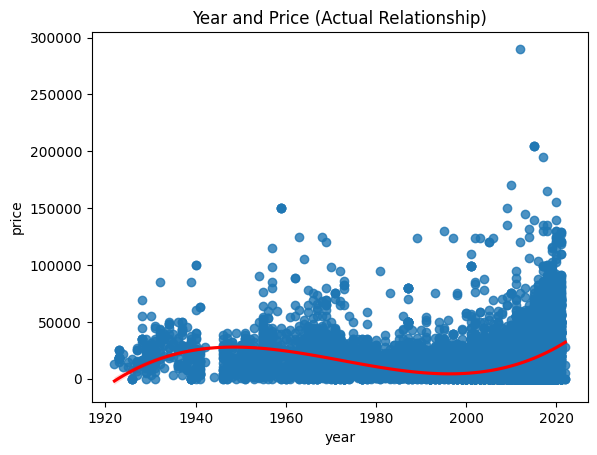

In [11]:
sns.regplot(data=final, x='year', y='price', order=3, line_kws={'color': 'r'})
plt.title("Year and Price (Actual Relationship)")

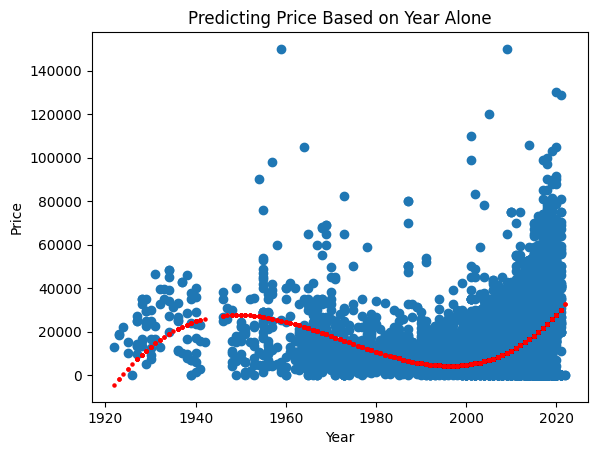

In [12]:
'''
MODEL 1
Polynomial Modeling on Year
'''
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)), # Polynomial transformation to capture relationship plotted above
    ('lr', LinearRegression())
])
pipe.fit(x_train[['year']], y_train)
preds = pipe.predict(x_test[['year']]) # Predict x_test
plt.scatter(x_test[['year']], y_test) # Plot x_test against y_test
plt.scatter(x_test['year'], preds, color='red', s=5) # Plot x_test predictions
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Predicting Price Based on Year Alone")
plt.show()

In [13]:
'''
MODEL 2
Linear Regression on categorical data with the highest coefficients
'''
highest_cat_lr = LinearRegression()
highest_cat_lr.fit(x_train[['type_truck', 'manufacturer_ram', 'manufacturer_ford', 'type_pickup']], y_train)
highest_cat_preds = highest_cat_lr.predict(x_test[['type_truck', 'manufacturer_ram', 'manufacturer_ford', 'type_pickup']])

In [14]:
'''
MODEL 3
Linear Regression on all categorical data (manufacturer, type, title status)
'''
cat_lr = LinearRegression()
cat_lr.fit(x_train[ohe.get_feature_names_out()], y_train)
cat_preds = cat_lr.predict(x_test[ohe.get_feature_names_out()])

In [15]:
'''
MODEL 4
GridSearch on Odometer
'''
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import numpy as np
scaled_ridge = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scale', StandardScaler()),
    ('ridge', Ridge())
])
params = {'ridge__alpha' : np.linspace(1, 5, 100)}
finder = GridSearchCV(scaled_ridge, params, scoring='neg_mean_absolute_error')
finder.fit(x_train[['odometer']], y_train)
best = finder.best_estimator_
grid_preds = best.predict(x_test[['odometer']])

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [16]:
from sklearn.metrics import mean_absolute_error
print("Model 1 MAE: (Year only)")
print(mean_absolute_error(y_test, preds))
print("Model 2 MAE: (Highest Correlated Categories)")
print(mean_absolute_error(y_test, highest_cat_preds))
print("Model 3 MAE: (All Categories)")
print(mean_absolute_error(y_test, cat_preds))
print("Model 4 NMAE: (Grid Search with Odometer)")
print(mean_absolute_error(y_test, grid_preds))

Model 1 MAE: (Year only)
7213.6409885819985
Model 2 MAE: (Highest Correlated Categories)
8059.639421612874
Model 3 MAE: (All Categories)
7693.288093086308
Model 4 NMAE: (Grid Search with Odometer)
8005.226789707667


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

# Non-technical Report of Findings
First, the data was visually inspected. Upon consideration of the available features, a select, relevant few were chosen to make predictions on. After an automated calculation of which features were most closely correlated with an increase in price, it was found that:
- The year that a car was built, 
- Whether it was a truck or a pickup, and 
- Whether it was manufactured by Ford or Ram 
were closely related to a direct increase in price. 

Conversely, the features that correlated with a decrease in price were:
- The odometer reading, and
- Whether the car was a sedan.

With these relationships in mind, predictive models were built on the aforementioned factors that contributed to an increase in price. Among these, the one that directly correlated the Year of the car to its price made the best predictions. The second-best model was one that considered all non-numeric features about a car: the type, manufacturer, and title status.

With these observations, it can be concluded that:
- <mark>Year:</mark> A car's price tends to increase with how recently it was built. Then the price decreases for some older cars, but it increases again for cars that are considered "vintage" (built between the 1940s and 1970s)
- <mark>Type:</mark> Customers consider the type of a car when buying/selling, and certain types of cars (such as trucks or pickups) tend to be sold for higher.
- <mark>Manufacturer:</mark> Certain manufacturers make high-selling cars due to their prestige, durability, reputation, etc.
- <mark>Title Status:</mark> Whether the car has been bought/sold legally, and other matters related to the registration of the car are also considered by buyers.
- <mark>Odometer:</mark> The lower the odometer, the higher the price.


# Technical Evaluation
### Shortcomings
A lot of data with missing and outlandish values were dropped.

I was unable to map the exponential relationship between odometer and price, due to my inexperience and the fact that we haven't gone over exponential/logarithmic regression in the course yet. 

The features that I selected in the beginning were based on my own experience as a buyer of used cars, and could have easily been altered to include some of the features I excluded.

The fact that there was a lot of categorical data made it hard to map a standard Linear Regression model. I am not aware of an effective estimator that incorporates many different categorical aspects at the same time, but if there was such a model, it would have worked well with this data. I did my best via One-Hot and Ordinal encoding.

### Rationale for Evaluation Metric
I chose Mean Absolute Error because Mean Squared Error and Root Mean Squared Error were too penalizing for the models that I generated.

### Next Steps
In the future, I would try Sequential Feature Selection to find which combination of features work the best for estimating the price. I believe some of the features that were discovered through my approach made sense, though, such as year, odometer, and title status.

I would also like to incorporate better estimators for non-linear and categorical relationships.

For the evaluation step, I would like to cross-validate across different samples from the data.

And finally, instead of removing all rows that had missing data, they could have been fixed or used partially so that the models would have more data to train on.